# Predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learnin model capable of predicting whether or not a patient has a heart disease based on their medical attributes.

Steps:
1. Problem Definition
2. Data
3. Evaluation- what defines sucess 
4. Features- data features to focus on
5. Modelling
6. Experimentation

## 1.Problem Defintion
Given the clinical data of patient, can we predict whether or not a patient can have a heart disease?

## 2.Data
This data was obtianed from kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3.Evaluaton- what metric?
if we can reach 95% accuracy at predicting whether or not a patient has a heart disease during the proof of concept, we'll pursur the project

## 4.Features
information about each features in the data
create data dictionary


### Import all tools

In [3]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [4]:
# Load data
df = pd.read_csv("heart-disease (2).csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


## Exploratory Data Aanalysis

1. what question(s) am i trying to solve?
2. what kind of data do i have and how do i treat the different types
3. what's missing from the data and how do i deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of my data?

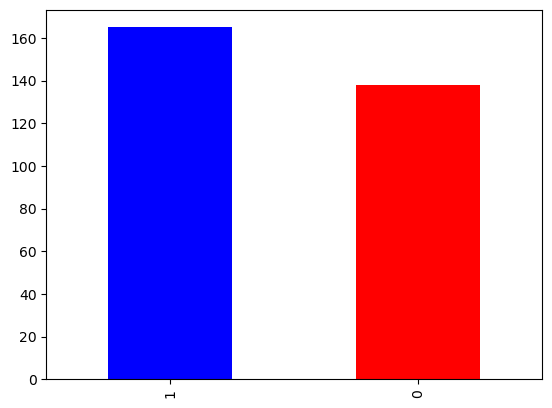

In [18]:
df["target"].value_counts().plot(kind="bar", color=["blue", "red"],);

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex


In [25]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [26]:
# compare the target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


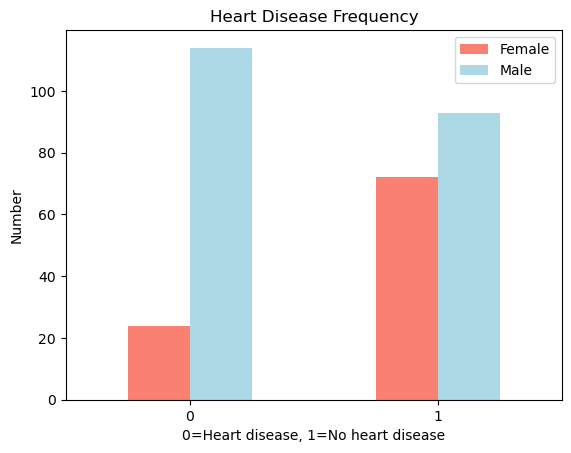

In [46]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=['salmon', 'lightblue'])
plt.title("Heart Disease Frequency")
plt.xlabel("0=Heart disease, 1=No heart disease")
plt.ylabel("Number")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

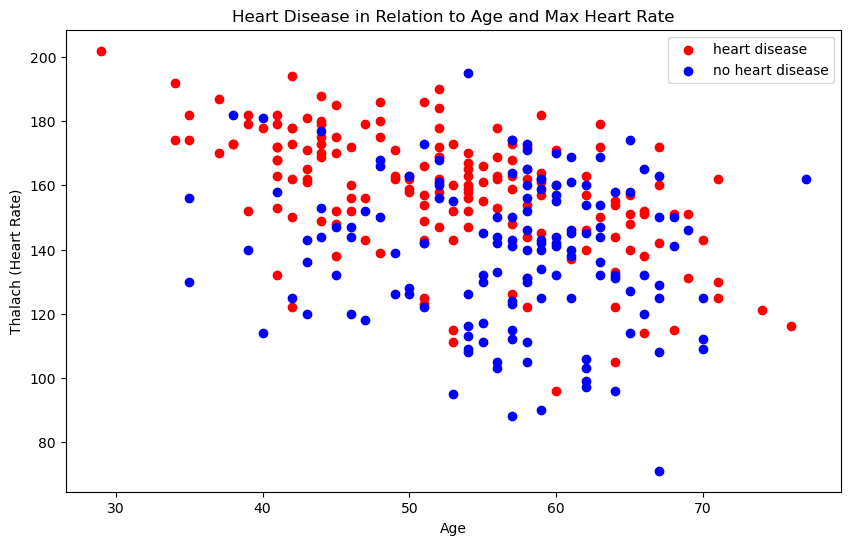

In [64]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="red")
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="blue");
plt.title("Heart Disease in Relation to Age and Max Heart Rate")
plt.legend(["heart disease", "no heart disease"])
plt.xlabel("Age")
plt.ylabel("Thalach (Heart Rate)");

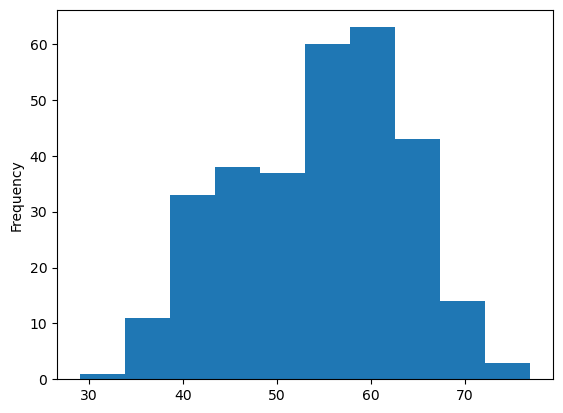

In [77]:
# Frequenct distribution of age
df.age.plot.hist();

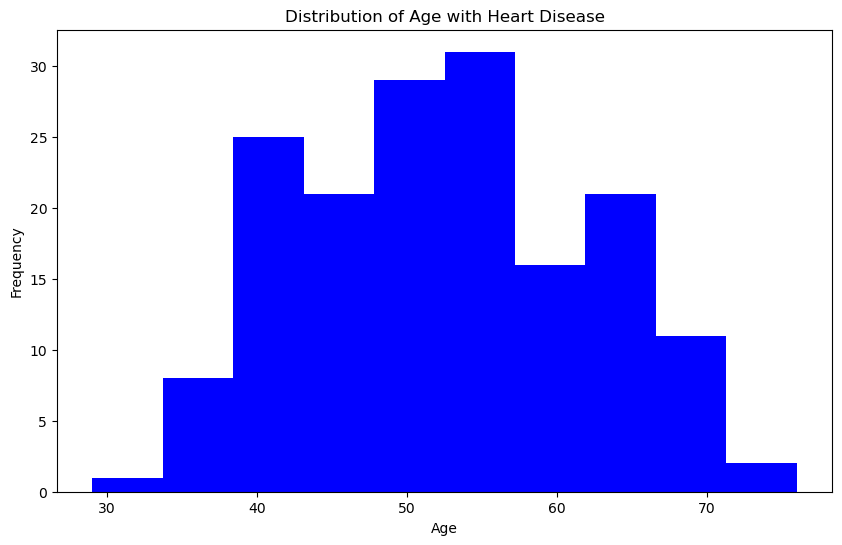

In [74]:
# Frequency Distribution of the age with heart disease
plt.figure(figsize=[10,6])
plt.hist(df.age[df.target==1],
        color="blue")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age with Heart Disease");

### Heart Disease per Chest Pain Type
cp-chest pain type
* 0:Typical angina: chest pain related decrease blood supply to the heart
* 1:Atypical angina: chest pain not related to heart
* 2:Non-anginal pain: typically esophageal spasms(not heart disease)
* 3:Asymptomatic: chest pain not showing signs of disease

        

In [82]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


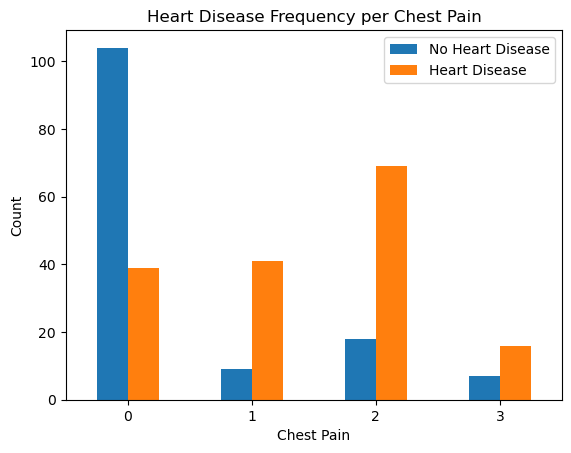

In [88]:
pd.crosstab(df.cp, df.target).plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Chest Pain")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.title("Heart Disease Frequency per Chest Pain");

In [89]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


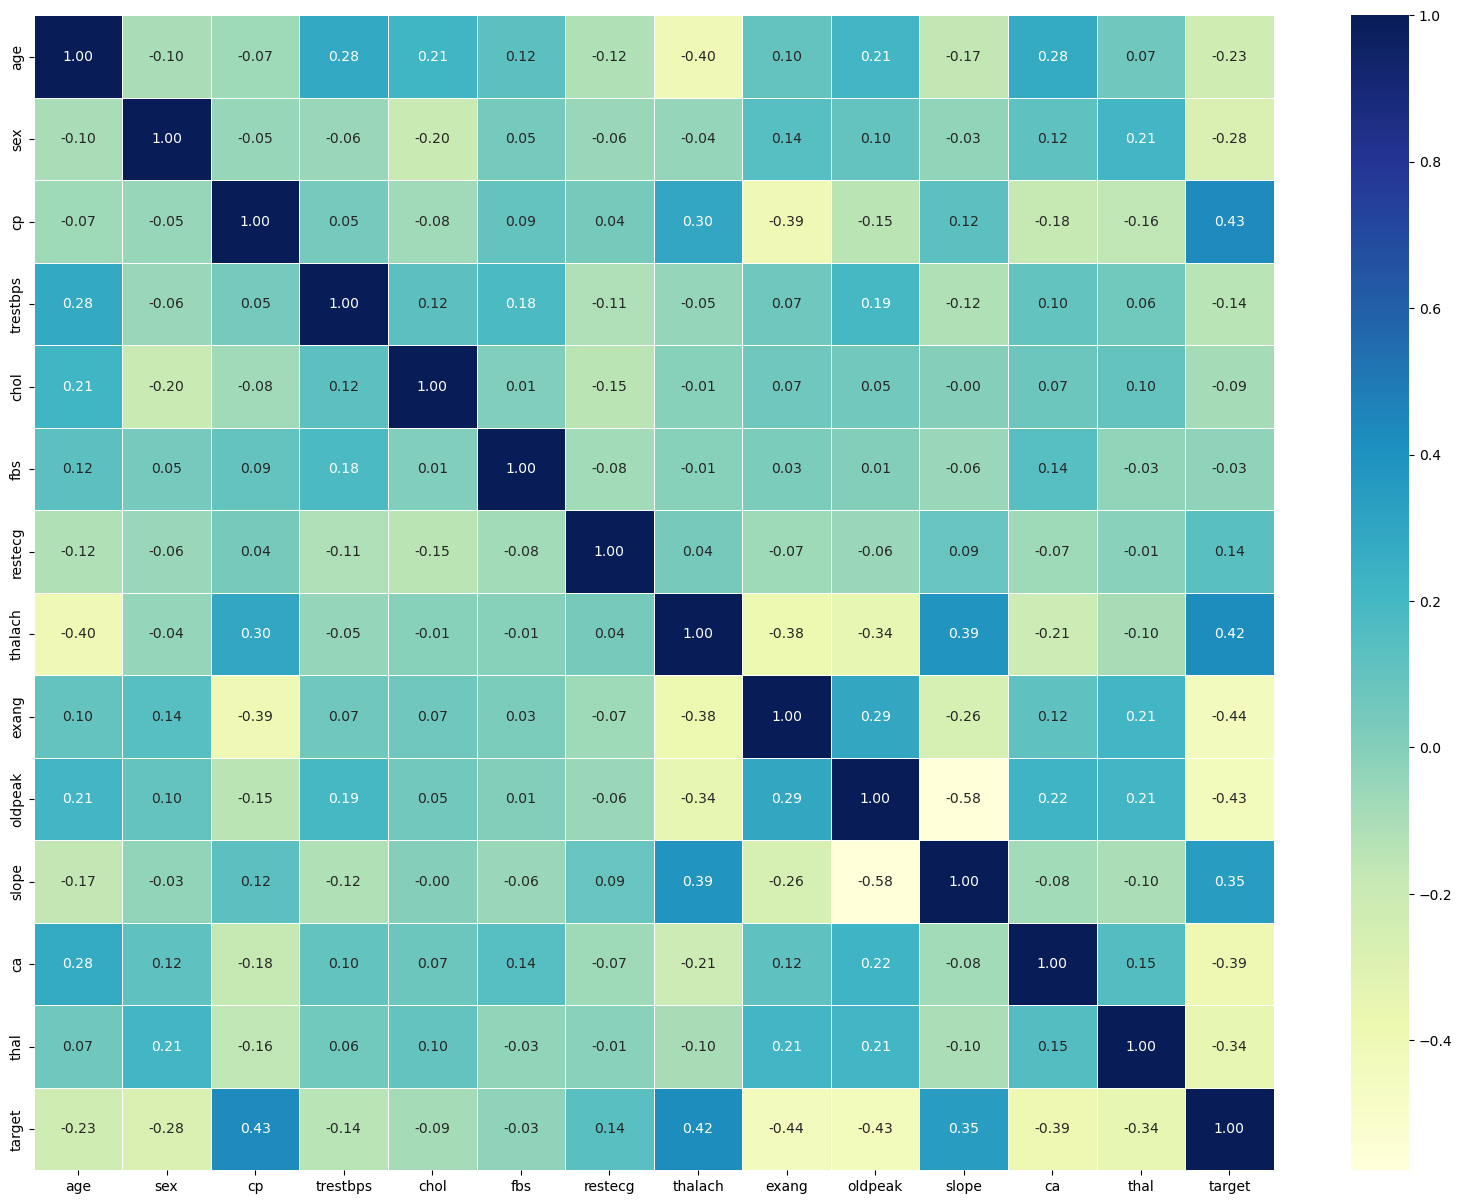

In [94]:
# Creating a Correlation Matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu");


## 5. Modelling

In [96]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
# Getting data ready

X = df.drop("target", axis=1)
y = df["target"]

In [99]:
# split data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size=0.2)

### Choosig a classification model-3 models will be used
* logistic Regression
* K-Nearest Neighbours Classification
* RandomForest Classifier


In [101]:
# Put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a funtion to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given machince learning models
    """
    np.random.seed(42)
    # an empty dict to keep the score
    model_score = {}
    #looping through the models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score
    

In [102]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

C:\Users\Will\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Will\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

In [104]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.819672131147541}

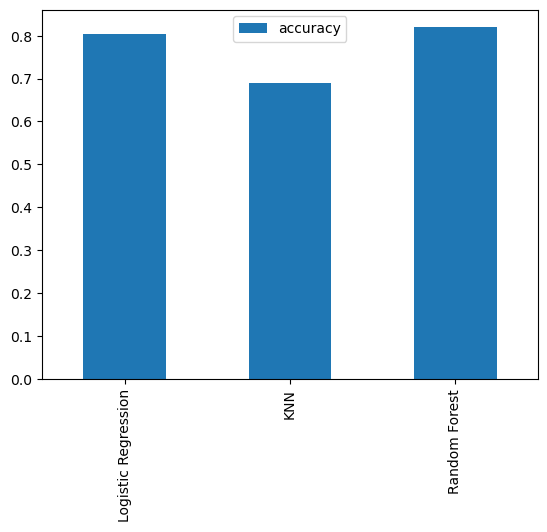

In [112]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar");


* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)



#### Hyperparameter tuning

In [116]:
# KNN hyperparameter tuning

train_scores = []
test_scores = []

# a list of different values for n_neighbors
neighbors = range(1, 21)

# Set up an instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

C:\Users\Will\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Will\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Will\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Will\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Maximum KNN score on the test data:75.41%


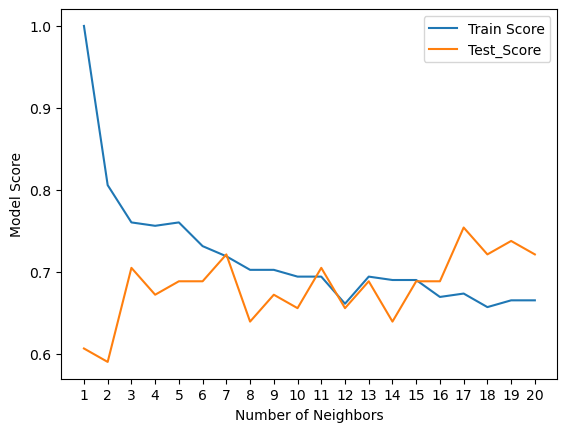

In [122]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test_Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

##### Hyperparameter tuning with randomizedserch CV

Tuning:
* LogisticRegression
* RandomForestClassifier

**using RandomizedSearchCV**


In [142]:
# hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# hperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}


In [131]:
# tuning parameter grid using RandomizedSearchCV

np.random.seed(42)

#LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [134]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [135]:
rs_log_reg.score(X_test,y_test)

0.819672131147541

In [143]:
# Tuning RandomForestClassifier

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [144]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [145]:
rs_rf.score(X_test, y_test)

0.819672131147541

In [146]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.819672131147541}

#### Tuning Hyperparameters of LogisticRegression using Gridsearch CV

In [149]:
# hyperparameters for logisticRegression
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}
# using Grid parameters for LogisticRegression
gs_reg = GridSearchCV(LogisticRegression(),
                     param_grid=log_reg_grid,
                     cv=5,
                     verbose=True)
gs_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [150]:
gs_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [151]:
gs_reg.score(X_test, y_test)

0.819672131147541

In [152]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.819672131147541}

#### Evalauting our machine learning Classifier beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision 
* Recall
* F1-score

to make comparisons and evaluate our trained model, first we need to make predictions.

In [153]:
# making predictions with tuned model
y_preds = gs_reg.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [154]:
y_test

202    0
262    0
155    1
221    0
57     1
      ..
170    0
126    1
151    1
261    0
32     1
Name: target, Length: 61, dtype: int64

C:\Users\Will\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


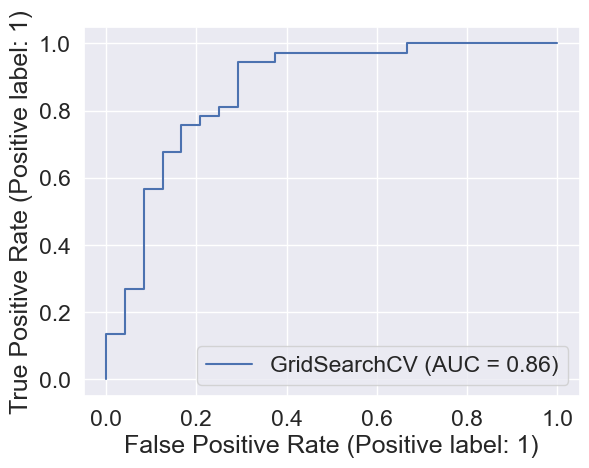

In [166]:
# Plot ROC curve and calculate AUC metric

plot_roc_curve(gs_reg, X_test, y_test);

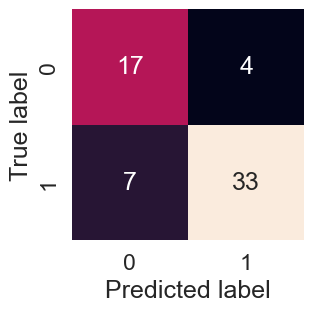

In [167]:
# Confusion Matrix using seaborn heatmap
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot confusion matrix using seaborn heatmap
    """
    fig, ax= plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_preds, y_test),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)


In [169]:
# classification report and cross-validated precision, recall and f1-score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.82      0.89      0.86        37

    accuracy                           0.82        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



### Calculate evalaution metrics using cross-validation

In [170]:
# using the best hyperparameter to instantiate classifier
gs_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [172]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [178]:
# cross validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [179]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [183]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")

cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [184]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")

cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [185]:
# Cross-validated f1
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")

cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

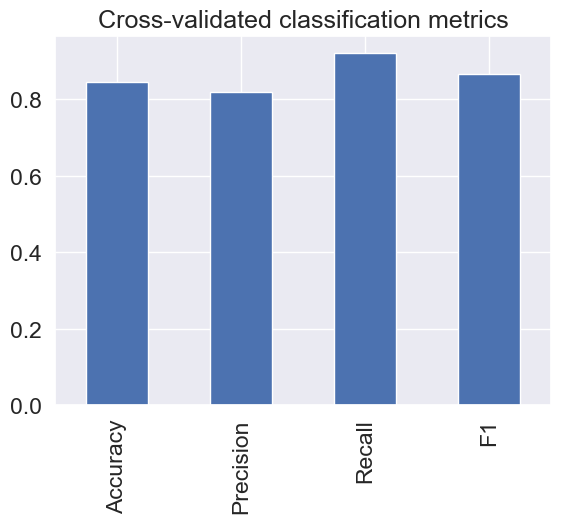

In [187]:
# visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

### feature importance
which features contibuted most to the outcome of the model and how did they contribute?

In [188]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [191]:
# finding the feature importance for our LogisticRegression model

# fit an instance of logisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train, y_train);

In [192]:
clf.coef_

array([[ 0.00438519, -0.85755812,  0.69790621, -0.01655961,  0.00147414,
         0.09984881,  0.27437503,  0.02506228, -0.67565603, -0.55382471,
         0.33616268, -0.5251136 , -0.70517956]])

In [194]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.004385185765781699,
 'sex': -0.8575581229650985,
 'cp': 0.6979062113627701,
 'trestbps': -0.016559609873129027,
 'chol': 0.0014741383451054339,
 'fbs': 0.09984880904430848,
 'restecg': 0.2743750295451906,
 'thalach': 0.02506228023675544,
 'exang': -0.675656029037868,
 'oldpeak': -0.5538247110856668,
 'slope': 0.336162676580498,
 'ca': -0.5251135961592599,
 'thal': -0.7051795558439227}

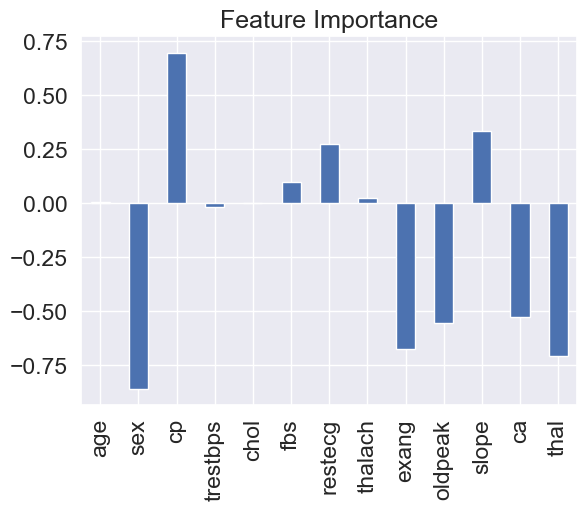

In [197]:
# visualizing feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## 6. Experimentation

since evaluation metric of 95% was not achieved during this proof of concept

* more data maybe used
* try other model like CatBoost or XGBoost
* try to improve current model